### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [3]:
import numpy as np
m = np.arange(12).reshape((3,4))
c_mean= np.mean(m, axis=0)
print("the column mean is ", c_mean,'\n')
r_mean= np.mean(m, axis=1)
print("the row mean is ", r_mean,'\n')
mean_all=np.mean(m)
print("the overall mean is ", mean_all,'\n')

the column mean is  [ 4.  5.  6.  7.] 

the row mean is  [ 1.5  5.5  9.5] 

the overall mean is  5.5 



2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [16]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

#using outer in numpy
outer_np=np.outer(u,v)
print('The outer product is', outer_np,'\n')
#using a loop

M=np.zeros((len(u),len(v)))
for i in range(0,len(u)):
    for j in range(0,len(v)):
        M[i,j]=u[i]*v[j]
print(M,'\n')
#Using broadcasting operations
M1=np.zeros((len(u),len(v)))
for i in range(len(v)):
    M1[:,i]=u*v[i]
print(M1,'\n')


The outer product is [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]] 

[[  2.   4.   6.   8.]
 [  6.  12.  18.  24.]
 [ 10.  20.  30.  40.]
 [ 14.  28.  42.  56.]] 

[[  2.   4.   6.   8.]
 [  6.  12.  18.  24.]
 [ 10.  20.  30.  40.]
 [ 14.  28.  42.  56.]] 



3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [49]:

a=np.random.random((10,6))
print(a,'\n')
mask=np.any(a<0.1, axis=1)
print(mask,'\n')
a[mask]=0
print(a)


[[ 0.29746565  0.17223886  0.17265378  0.39250456  0.18492499  0.30639422]
 [ 0.21236659  0.31859145  0.79156421  0.23575399  0.17651959  0.97740265]
 [ 0.86851119  0.78040917  0.06449928  0.01720951  0.37064389  0.40147865]
 [ 0.11998033  0.14116626  0.21676708  0.71465243  0.67750816  0.38195938]
 [ 0.27570453  0.19832742  0.32988477  0.429001    0.13426749  0.31296992]
 [ 0.00476038  0.49446516  0.50613149  0.71669287  0.1622086   0.05736266]
 [ 0.33775913  0.39927001  0.81484887  0.58409956  0.72614584  0.70061853]
 [ 0.16711472  0.11472057  0.92276396  0.98281939  0.26211849  0.34470655]
 [ 0.04458757  0.30915546  0.01793436  0.72605951  0.37800899  0.91018279]
 [ 0.53639772  0.34758919  0.94011368  0.09054232  0.81258967  0.83474153]] 

[False False  True False False  True False False  True  True] 

[[ 0.29746565  0.17223886  0.17265378  0.39250456  0.18492499  0.30639422]
 [ 0.21236659  0.31859145  0.79156421  0.23575399  0.17651959  0.97740265]
 [ 0.          0.          0.    

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[ 0.03365503  0.0560823   0.07849545  0.01121928]


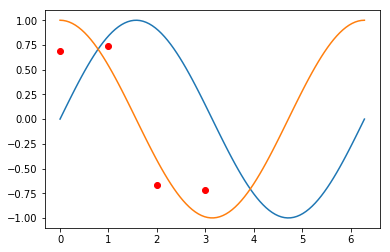

In [72]:
nb = np.linspace(0, 2*np.pi, 100)
#print(nb,'\n')
step10=nb[9::10]
#print(step10,'\n')
reversed_nb=nb[::-1]
#print(reversed_nb,'\n')

M=np.absolute(np.cos(nb)-np.sin(nb))
mask=(M<0.1)
el=M[mask]
print(el)

idx=np.where(M<0.1)

import matplotlib.pyplot as plt # everybody imports it that way

%matplotlib inline
ys=np.sin(nb)
yc=np.cos(nb)
points=np.sin(nb[idx])
plt.plot(nb,ys)
plt.plot(nb,yc)
plt.plot(points,'ro')


5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.